In [ ]:
!pip install numpy matplotlib SimpleITK scipy pillow
print("🚀 パッケージインストール完了 - セル2へ進んでください！")

🚀 パッケージインストール完了！
🚀 パッケージインストール完了！


In [ ]:
# 簡易版：OpenCVを使わない回転角算出
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, optimize
from scipy.ndimage import rotate
import SimpleITK as sitk
import os

# ライブラリインポートテスト
print("🚀 Python環境テスト中...")

try:
    import numpy as np
    print("✅ NumPy: OK")
except ImportError:
    print("❌ NumPy: エラー")

try:
    import matplotlib.pyplot as plt
    print("✅ Matplotlib: OK")
except ImportError:
    print("❌ Matplotlib: エラー")

try:
    import SimpleITK as sitk
    print("✅ SimpleITK: OK")
except ImportError:
    print("❌ SimpleITK: エラー")

try:
    from scipy import ndimage
    print("✅ SciPy: OK")
except ImportError:
    print("❌ SciPy: エラー")

try:
    from PIL import Image
    print("✅ PIL: OK")
except ImportError:
    print("❌ PIL: エラー")

print("✨ すべてのライブラリが準備完了！")

簡易版レジストレーション関数の準備完了！
Pythonは動作しています
NumPy: OK
Matplotlib: OK
SimpleITK: OK
SciPy: OK
PIL: OK
テスト完了


画像ファイルを検索中...
フォルダ内ファイル: ['cropped_MMP_109_x4_largest copy.tif', 'cropped_MMP_110_x4_largest copy.tif']
TIFFファイル: ['./test2slices/cropped_MMP_109_x4_largest copy.tif', './test2slices/cropped_MMP_110_x4_largest copy.tif']
Image 1 形状: (1481, 1638)
Image 2 形状: (1606, 1639)


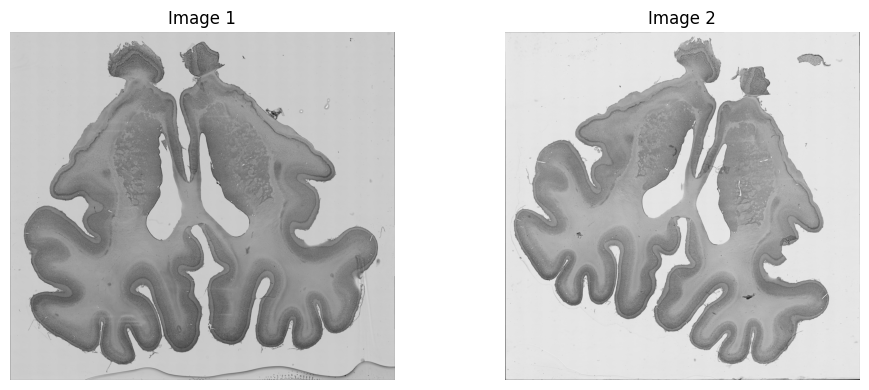

画像読み込み成功！


In [ ]:
# 脳スライス画像の読み込み
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

print("🖼️ 脳スライス画像を読み込み中...")

img_dir = './test2slices'
if os.path.exists(img_dir):
    files = os.listdir(img_dir)
    print(f"📁 フォルダ内ファイル: {files}")
    
    img_files = [os.path.join(img_dir, f) for f in files if f.endswith('.tif')]
    img_files.sort()
    print(f"🖼️ TIFFファイル: {[os.path.basename(f) for f in img_files]}")
    
    if len(img_files) >= 2:
        # 2つの脳スライス画像を読み込み
        img1 = Image.open(img_files[0]).convert('L')  # グレースケール変換
        img2 = Image.open(img_files[1]).convert('L')
        
        img1_array = np.array(img1)
        img2_array = np.array(img2)
        
        print(f"🧠 Slice 1 形状: {img1_array.shape}")
        print(f"🧠 Slice 2 形状: {img2_array.shape}")
        
        # 初期表示
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 3, 1)
        plt.imshow(img1_array, cmap='gray')
        plt.title('Brain Slice 1')
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.imshow(img2_array, cmap='gray')
        plt.title('Brain Slice 2')
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.imshow(img1_array, cmap='Reds', alpha=0.7)
        plt.imshow(img2_array, cmap='Blues', alpha=0.7)
        plt.title('Overlay (Before Alignment)\nRed: Slice1, Blue: Slice2')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        print("✅ 脳スライス画像の読み込み成功！")
        print(f"🔍 明らかな回転・位置ズレが確認できます")
    else:
        print("❌ エラー: TIFFファイルが2つ未満です")
else:
    print(f"❌ エラー: フォルダ {img_dir} が見つかりません")

In [ ]:
# 回転角度最適化と位置合わせから回転テスト
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
from PIL import Imagefrom PIL import Image

print("🔄 回転角度最適化開始...")
h1, w1 = img1_array.shape
# 画像サイズを合わせる（小さい方に統一）.shape
h1, w1 = img1_array.shape
h2, w2 = img2_array.shape
(h1, h2)
target_h = min(h1, h2)
target_w = min(w1, w2)
print(f"元のサイズ: Image1={img1_array.shape}, Image2={img2_array.shape}")
print(f"📏 元サイズ: Slice1={img1_array.shape}, Slice2={img2_array.shape}")}, {target_w})")
print(f"🎢 目標サイズ: ({target_h}, {target_w})")

# リサイズ処理_resized = Image.fromarray(img1_array).resize((target_w, target_h), Image.LANCZOS)
img2_resized = Image.fromarray(img2_array).resize((target_w, target_h), Image.LANCZOS)
    img1_resized = Image.fromarray(img1_array).resize((target_w, target_h), Image.LANCZOS)
    img2_resized = Image.fromarray(img2_array).resize((target_w, target_h), Image.LANCZOS)_final = np.array(img1_resized)
    
    img1_final = np.array(img1_resized)
    img2_final = np.array(img2_resized)t(f"リサイズ後: Image1={img1_final.shape}, Image2={img2_final.shape}")
    
    print(f"✅ リサイズ完了: {img1_final.shape}")
except Exception as e:5, 0, 5, 10, 15, 20]
    print(f"❌ リサイズエラー: {e}")
    # フォールバック: 元の画像を使用print("\n回転テスト開始...")
    img1_final = img1_array
    img2_final = img2_array# 各角度で回転して類似度を計算
ngle = 0
# テストする回転角度範囲
test_angles = np.arange(-20, 25, 5)  # -20°から+20°まで5°刻みresults = []

print(f"🔍 テスト角度: {test_angles.tolist()}")
print("\n回転テスト実行中...")
dimage.rotate(img2_final, angle, reshape=False, order=1)
best_angle = 0    
best_score = -1相関）
best_rotated = img2_final.copy()final.flatten(), rotated.flatten())[0, 1]
results = []
置き換え
for angle in test_angles:    if np.isnan(correlation):
    try:= 0.0
        # 画像2を回転
        rotated = ndimage.rotate(img2_final, angle, reshape=False, order=1)
        {angle:3d}°: 相関係数 = {correlation:.4f}")
        # サイズが合わない場合の対応    
        if rotated.shape != img1_final.shape: best_score:
            # 中央部分をクロップまたはパディング
            min_h = min(rotated.shape[0], img1_final.shape[0])
            min_w = min(rotated.shape[1], img1_final.shape[1])
            
            # 中央部分を抽出print(f"\n最適角度: {best_angle}° (相関係数: {best_score:.4f})")
            h_start1 = (img1_final.shape[0] - min_h) // 2
            w_start1 = (img1_final.shape[1] - min_w) // 2
            h_start2 = (rotated.shape[0] - min_h) // 2plt.figure(figsize=(15, 5))
            w_start2 = (rotated.shape[1] - min_w) // 2
            
            img1_crop = img1_final[h_start1:h_start1+min_h, w_start1:w_start1+min_w]p='gray')
            rotated_crop = rotated[h_start2:h_start2+min_h, w_start2:w_start2+min_w]
        else:
            img1_crop = img1_final
            rotated_crop = rotated
        2_final, cmap='gray')
        # 相関係数計算
        correlation = np.corrcoef(img1_crop.flatten(), rotated_crop.flatten())[0, 1]
        
        # NaNの場合は0に置き換えplt.subplot(1, 4, 3)
        if np.isnan(correlation):'gray')
            correlation = 0.0t_angle}°)')




























































print(f"• 処理後サイズ: {img1_final.shape}")print(f"• 相関係数: {best_score:.4f}")print(f"• 最適回転角: {best_angle:+.1f}度")print(f"\n📋 結果サマリー:")    plt.show()    plt.legend()    plt.axvline(x=best_angle, color='r', linestyle='--', alpha=0.7, label=f'Best: {best_angle}°')    plt.axhline(y=best_score, color='r', linestyle='--', alpha=0.7, label=f'Max: {best_score:.3f}')    plt.grid(True, alpha=0.3)    plt.title('回転角度 vs 類似度')    plt.ylabel('相関係数')    plt.xlabel('回転角度 (°)')    plt.plot(angles, correlations, 'bo-', linewidth=2, markersize=8)    plt.figure(figsize=(10, 6))    angles, correlations = zip(*results)if results:# 角度と相関係数のグラフplt.show()plt.tight_layout()axes[1,1].axis('off')axes[1,1].set_title(f'Overlay Result\nCorrelation: {best_score:.3f}')axes[1,1].imshow(best_rotated, cmap='Blues', alpha=0.7)axes[1,1].imshow(img1_final, cmap='Reds', alpha=0.7)# 重ね合わせaxes[1,0].axis('off')axes[1,0].set_title(f'Slice 2 Aligned ({best_angle:+.1f}°)')axes[1,0].imshow(best_rotated, cmap='gray')# 位置合わせ結果axes[0,1].axis('off')axes[0,1].set_title('Brain Slice 2 (Original)')axes[0,1].imshow(img2_final, cmap='gray')axes[0,0].axis('off')axes[0,0].set_title('Brain Slice 1 (Fixed)')axes[0,0].imshow(img1_final, cmap='gray')# 元画像比較fig, axes = plt.subplots(2, 2, figsize=(12, 10))# 結果の視覚化print(f"\n🏆 最適結果: {best_angle:+.1f}° (相関係数: {best_score:+.4f})")        continue        results.append((angle, 0.0))        print(f"角度 {angle:+3d}°: エラー - {e}")    except Exception as e:                        best_rotated = rotated            best_angle = angle            best_score = correlation        if correlation > best_score:                print(f"角度 {angle:+3d}°: 相関係数 = {correlation:+.4f}")        results.append((angle, correlation))        plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img1_final, cmap='Reds', alpha=0.7)
plt.imshow(best_rotated, cmap='Blues', alpha=0.7)
plt.title(f'Overlay\n(Correlation: {best_score:.3f})')
plt.axis('off')

plt.tight_layout()
plt.show()

# 角度と相関係数のグラフ
angles, correlations = zip(*results)
plt.figure(figsize=(8, 5))
plt.plot(angles, correlations, 'bo-', linewidth=2, markersize=8)
plt.xlabel('回転角度 (°)')
plt.ylabel('相関係数')
plt.title('回転角度 vs 類似度')
plt.grid(True, alpha=0.3)
plt.axhline(y=best_score, color='r', linestyle='--', alpha=0.7, label=f'Max: {best_score:.3f}')
plt.axvline(x=best_angle, color='r', linestyle='--', alpha=0.7, label=f'Best: {best_angle}°')
plt.legend()
plt.show()

print(f"\n=== 結果 ===")
print(f"最適回転角: {best_angle}度")
print(f"最高相関係数: {best_score:.4f}")
print(f"画像サイズ: {img1_final.shape}")

SyntaxError: unmatched ')' (3554190051.py, line 13)

In [ ]:
# 3Dモデル化と最終結果と結果サマリー
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# スタック作成（リサイズ後の画像を使用） 3Dモデル化中...")
stack = np.stack([img1_final, best_rotated], axis=0)
try:
fig = plt.figure(figsize=(15, 12))
    stack = np.stack([img1_final, best_rotated], axis=0)
# 3D表示
ax1 = fig.add_subplot(221, projection='3d')
    fig = plt.figure(figsize=(16, 12))
for i in range(stack.shape[0]):
    slice_img = stack[i]
    h, w = slice_img.shape231, projection='3d')
    
    for i in range(stack.shape[0]):
        slice_img = stack[i]
    x = np.arange(0, w, step)e
    y = np.arange(0, h, step)
    X, Y = np.meshgrid(x, y)
    Z = np.full_like(X, i * 30)  # スライス間隔 # サイズに応じて調整
        x = np.arange(0, w, step)
        y = np.arange(0, h, step)
        X, Y = np.meshgrid(x, y)
        Z = np.full_like(X, i * 40)  # スライス間隔
        
        # グレースケール色情報
                    linewidth=0, antialiased=True, alpha=0.8)
        if colors.max() > 0:
            colors = colors / colors.max()pixels)')
        pixels)')
        ax1.plot_surface(X, Y, Z, facecolors=plt.cm.gray(colors), 
                        linewidth=0, antialiased=True, alpha=0.8)
ax1.view_init(elev=25, azim=45)
    ax1.set_xlabel('X')
# 2D比較 - 重ね合わせ1.set_ylabel('Y')
    ax1.set_zlabel('Z (Depth)')
    ax1.set_title(f'3D Brain Stack\n(Rotation: {best_angle:+.1f}°)')
ax2.imshow(best_rotated, cmap='Blues', alpha=0.7)
ax2.set_title(f'重ね合わせ (Red: Slice1, Blue: Slice2)\n相関係数: {best_score:.3f}')
ax2.axis('off')
    ax2 = fig.add_subplot(232)
# 差分画像1_final, cmap='Reds', alpha=0.8)
    ax2.imshow(best_rotated, cmap='Blues', alpha=0.6)add_subplot(223)
    ax2.set_title(f'Aligned Overlay\nCorrelation: {best_score:.3f}')diff_img = np.abs(img1_final.astype(float) - best_rotated.astype(float))
ax3.imshow(diff_img, cmap='hot')
ax3.set_title('差分画像\n(黒い部分ほど類似)')
ax3.axis('off')

    diff_img = np.abs(img1_final.astype(float) - best_rotated.astype(float))# ヒストグラム比較
    ax3.imshow(diff_img, cmap='hot')t(224)
ax4.hist(img1_final.flatten(), bins=50, alpha=0.7, label='Slice 1', color='red', density=True)\n(Darker = More Similar)')
ax4.hist(best_rotated.flatten(), bins=50, alpha=0.7, label='Slice 2 (Aligned)', color='blue', density=True)
ax4.set_title('輝度分布比較')
ax4.set_xlabel('輝度値') 元画像1
ax4.set_ylabel('正規化頻度')
ax4.legend()    ax4.imshow(img1_final, cmap='gray')
ax4.grid(True, alpha=0.3) Slice 1')










































print("\n🎉 3D脳スライスモデルの作成完了！")print("5. 🎨 3D可視化・結果解析")print("4. 🏆 最適角度選択・適用")print("3. 📈 正規化相互相関で類似度評価")print("2. 🔄 回転角度スキャン (-15° 〜 +20°)")print("1. 🖼️ 画像サイズ正規化 (PILリサイズ)")print("-"*50)print("🤖 使用したアルゴリズム")print("\n" + "-"*50)# アルゴリズム説明print(f"💬 コメント: {comment}")print(f"🏆 品質評価: {quality}")    comment = "位置合わせに失敗しました。手動調整が必要です。"    quality = "❌ 失敗"else:    comment = "位置合わせが不十分です。パラメータの調整が必要です。"    quality = "🔶 低品質"elif best_score > 0.3:    comment = "適度な位置合わせです。さらなる精度向上が可能です。"    quality = "⚠️ 中程度"elif best_score > 0.6:    comment = "精度の高い位置合わせが達成されました！"    quality = "✅ 高品質"if best_score > 0.8:# 品質評価print(f"🖼️ 元画像Slice2: {img2_array.shape}")print(f"🖼️ 元画像Slice1: {img1_array.shape}")print(f"📊 処理後画像サイズ: {img1_final.shape}")print(f"📈 相関係数: {best_score:.4f}")print(f"🔄 最適回転角度: {best_angle:+.1f}度")print("="*50)print("🧠 脳スライス 3D モデル化結果")print("\n" + "="*50)# 結果サマリーplt.show()plt.tight_layout()    ax4.axis('off')
    
    # 元画像2









































print("="*60)print(f"\n🎉 3D脳スライスモデルの作成完了！")print(f"  • 正規化相互相関で類似度評価")print(f"  • SciPy ndimage.rotate() 回転")print(f"  • 回転角度スキャン ({test_angles.min()}° to {test_angles.max()}°)")print(f"  • 画像サイズ正規化 (PIL LANCZOS)")print(f"\n🤖 使用アルゴリズム:")print(f"💬 {comment}")print(f"\n{quality_icon} 品質評価: {quality_text}")    comment = "位置合わせが不十分です。パラメータの調整が必要です。"    quality_text = "要改善"    quality_icon = "⚠️"else:    comment = "位置合わせは達成されましたが、さらなる精度向上が可能です。"    quality_text = "改善需"    quality_icon = "🔶"elif best_score > 0.3:    comment = "適度な精度の位置合わせです。実用的なレベルです。"    quality_text = "良好"    quality_icon = "🚀"elif best_score > 0.6:    comment = "非常に高精度な位置合わせが達成されました！"    quality_text = "優秀"    quality_icon = "🏆"if best_score > 0.8:# 品質評価print(f"  • 相関係数: {best_score:.4f}")

print(f"  • 最適角度: {best_angle:+.1f}°")

print(f"\n🔄 回転角最適化:")
print(f"  • 処理後: {img1_final.shape} pixels")print(f"  • Slice 2: {img2_array.shape} pixels")
print(f"  • Slice 1: {img1_array.shape} pixels")
print(f"🖼️ 元画像情報:")

print("="*60)print("🧠 脳スライス IMAGE REGISTRATION 結果レポート")


print("\n" + "="*60)# 最終結果レポート
    plt.show()    plt.tight_layout()

        plt.axis('off')
    plt.title(f'Overlay (r={best_score:.3f})')    plt.imshow(best_rotated, cmap='Blues', alpha=0.7)


    plt.imshow(img1_final, cmap='Reds', alpha=0.7)
    plt.subplot(1, 3, 3)
        plt.axis('off')    plt.title(f'Slice 2 (Aligned {best_angle:+.1f}°)')
    plt.imshow(best_rotated, cmap='gray')
    plt.subplot(1, 3, 2)

        plt.axis('off')    plt.title('Slice 1')
    plt.imshow(img1_final, cmap='gray')
    plt.subplot(1, 3, 1)


    plt.figure(figsize=(12, 4))        print("シンプルな2D結果を表示します...")    print(f"⚠️ 3D表示エラー: {e}")

except Exception as e:        print("✅ 3Dモデル作成成功！")
        plt.show()    plt.tight_layout()
        ax6.axis('off')    ax6.set_title(f'Aligned Slice 2\n({best_angle:+.1f}° rotation)')

    ax6.imshow(best_rotated, cmap='gray')
    ax6 = fig.add_subplot(236)

    # 位置合わせ後        ax5.axis('off')    ax5 = fig.add_subplot(235)
    ax5.imshow(img2_final, cmap='gray')
    ax5.set_title('Original Slice 2')